In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from joblib import dump
from sklearn.cluster import HDBSCAN
from sklearn.metrics import (
    calinski_harabasz_score,
    davies_bouldin_score,
    silhouette_samples,
    silhouette_score,
)

In [2]:
df = pd.read_csv("../../../Datasets/ClusterPoints.csv")
df.head()

,X,Y
0,33,43
1,48,10
2,15,32
3,41,16
4,47,11


In [3]:
silhouette = []
calinski_harabasz = []
davies_bouldin = []
silhouette_s = []
for k in range(2, 11):
    hdbscan = HDBSCAN(min_cluster_size=k)
    cluster_labels = hdbscan.fit_predict(df)
    silhouette.append(silhouette_score(df, cluster_labels))
    calinski_harabasz.append(calinski_harabasz_score(df, cluster_labels))
    davies_bouldin.append(davies_bouldin_score(df, cluster_labels))
    silhouette_s.append(silhouette_samples(df, cluster_labels))

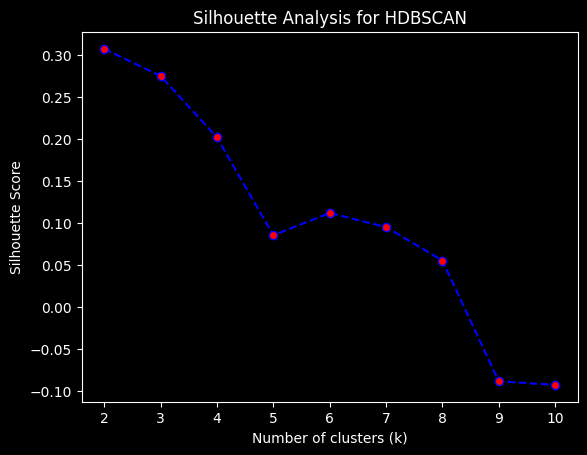

In [4]:
plt.plot(
    range(2, 11),
    silhouette,
    linestyle="dashed",
    color="blue",
    marker="o",
    markerfacecolor="red",
)
plt.xticks(np.arange(2, 11))
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Analysis for HDBSCAN")
plt.show()

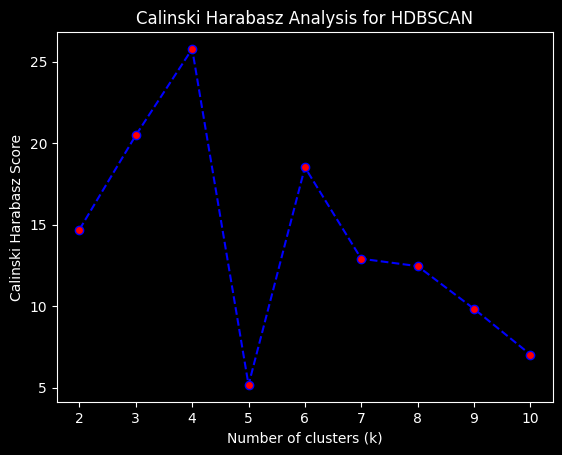

In [5]:
plt.plot(
    range(2, 11),
    calinski_harabasz,
    linestyle="dashed",
    color="blue",
    marker="o",
    markerfacecolor="red",
)
plt.xticks(np.arange(2, 11))
plt.xlabel("Number of clusters (k)")
plt.ylabel("Calinski Harabasz Score")
plt.title("Calinski Harabasz Analysis for HDBSCAN")
plt.show()

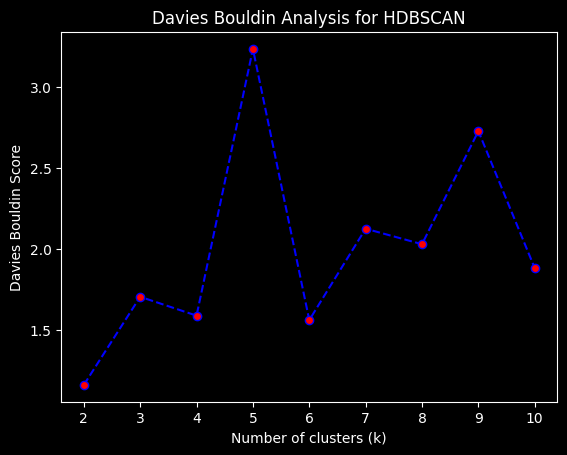

In [6]:
plt.plot(
    range(2, 11),
    davies_bouldin,
    linestyle="dashed",
    color="blue",
    marker="o",
    markerfacecolor="red",
)
plt.xticks(np.arange(2, 11))
plt.xlabel("Number of clusters (k)")
plt.ylabel("Davies Bouldin Score")
plt.title("Davies Bouldin Analysis for HDBSCAN")
plt.show()

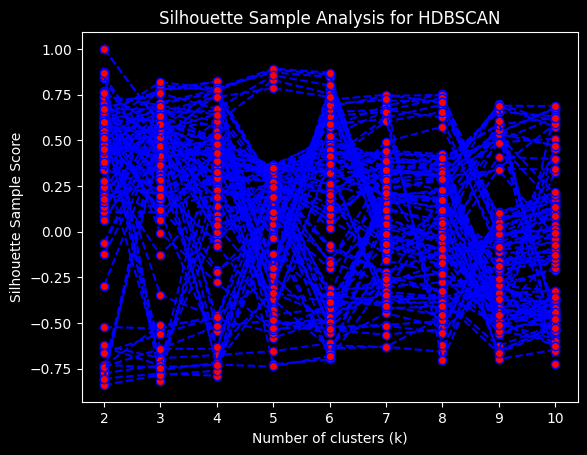

In [7]:
plt.plot(
    range(2, 11),
    silhouette_s,
    linestyle="dashed",
    color="blue",
    marker="o",
    markerfacecolor="red",
)
plt.xticks(np.arange(2, 11))
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette Sample Score")
plt.title("Silhouette Sample Analysis for HDBSCAN")
plt.show()

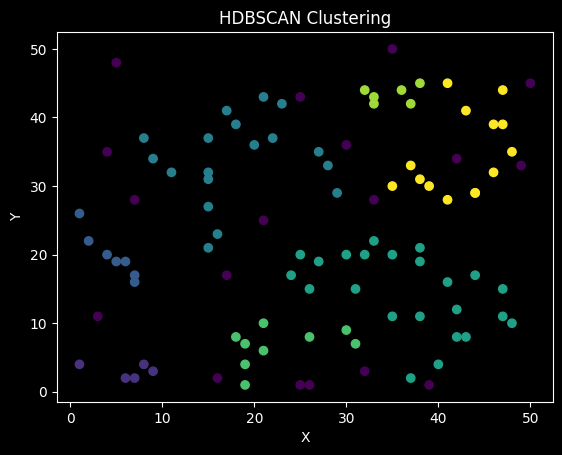

In [8]:
hdbscan = HDBSCAN(min_cluster_size=4)
cluster_labels = hdbscan.fit_predict(df)
plt.scatter(df["X"], df["Y"], c=cluster_labels)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("HDBSCAN Clustering")
plt.show()

In [9]:
print("Silhouette Score :", silhouette_score(df, cluster_labels))
print("Calinski Harabasz Score :", calinski_harabasz_score(df, cluster_labels))
print("Davies Bouldin Score :", davies_bouldin_score(df, cluster_labels))
print("Silhouette Samples :", silhouette_samples(df, cluster_labels))

Silhouette Score : 0.20210185747098908
Calinski Harabasz Score : 25.77873644900627
Davies Bouldin Score : 1.588110977236181
Silhouette Samples : [ 0.78724006  0.45910667  0.47412806  0.50414549  0.47578174 -0.64206523
 -0.64128455  0.76413095 -0.01962281  0.59392931  0.45444717  0.56368678
  0.26880843  0.82174673 -0.46918729  0.66101174  0.7556452   0.21663429
  0.30453179  0.34934594  0.52105839 -0.47524278 -0.45868096  0.57606055
  0.42622967 -0.0016004  -0.05432822 -0.63294286  0.78478734  0.43424676
  0.20069092  0.51242675 -0.67507309  0.36239359  0.27395611  0.56841038
  0.21656852  0.27713532  0.29127689 -0.72915219  0.00715316  0.49712562
  0.82313003  0.4199636   0.77193745  0.50911364 -0.71698143  0.35832097
  0.41649036  0.64519942 -0.72352405  0.49007964  0.39104937  0.18352202
  0.43561916  0.02450675  0.78360528  0.48722187  0.31014549  0.45174524
 -0.21088023 -0.71989424 -0.4771326   0.42363087  0.75226165  0.2452218
  0.55109729 -0.21999407  0.23736381 -0.00413851  0.0

In [10]:
dump(hdbscan, "../../../Models/HDBSCAN.joblib")

['../../../Models/HDBSCAN.joblib']